In [125]:
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.datasets import fetch_openml

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [126]:
whitedf = pd.read_csv('winequality-white.csv', sep=';')
# whitedf['quality']= whitedf['quality'].astype('category')

In [127]:
whitedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<Axes: >

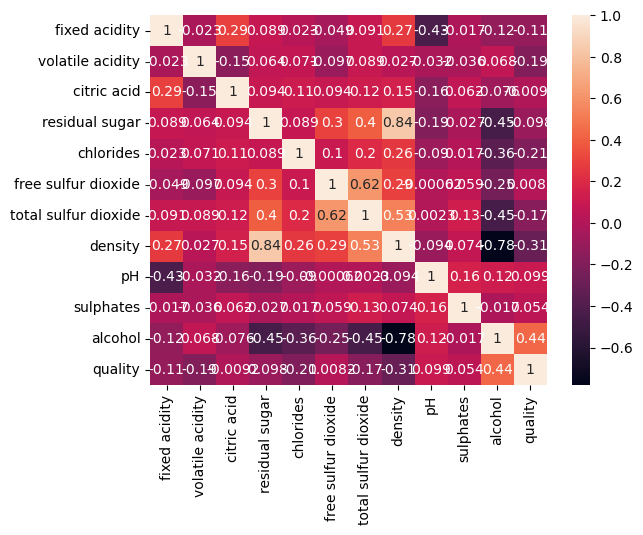

In [128]:
whitedf.corr(method='spearman').sort_values(by ='quality', ascending=False)['quality']
# density, chlorides 가 의심 요소

sns.heatmap(whitedf.corr(), annot=True)

In [129]:
whitedf.drop_duplicates(inplace=True)
whitedf.shape

(3961, 12)

In [130]:
from scipy import stats
z = np.abs(stats.zscore(whitedf))

threshold = 3
print(np.where(z > threshold))

(array([   0,   13,   18,   34,   35,   47,   63,   84,  125,  131,  142,
        151,  155,  166,  167,  168,  177,  177,  188,  193,  194,  211,
        212,  213,  228,  248,  267,  275,  275,  288,  305,  316,  333,
        369,  370,  374,  403,  425,  446,  463,  503,  541,  551,  572,
        576,  576,  615,  623,  628,  638,  639,  640,  650,  651,  653,
        688,  689,  694,  697,  712,  717,  729,  729,  732,  733,  734,
        776,  795,  797,  817,  822,  822,  823,  823,  854,  856,  862,
        867,  871,  871,  871,  873,  877,  888,  888,  950,  951,  977,
        982,  991,  998, 1025, 1025, 1028, 1028, 1037, 1046, 1051, 1051,
       1056, 1060, 1060, 1061, 1063, 1068, 1076, 1082, 1091, 1092, 1101,
       1104, 1109, 1123, 1159, 1159, 1162, 1174, 1175, 1185, 1199, 1199,
       1200, 1201, 1205, 1205, 1215, 1218, 1223, 1230, 1231, 1233, 1237,
       1244, 1250, 1253, 1254, 1255, 1262, 1270, 1273, 1277, 1288, 1289,
       1295, 1308, 1308, 1316, 1323, 1324, 1328, 1

In [131]:

whitedf = whitedf[(z < 3).all(axis=1)]
whitedf
whitedf.shape

(3620, 12)

In [132]:
whitedf.loc[:,'CategoricalGrade'] = pd.cut(whitedf['quality'], bins=[0, 3, 6, 10], labels=['bad', 'average', 'good'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2540\37313070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whitedf.loc[:,'CategoricalGrade'] = pd.cut(whitedf['quality'], bins=[0, 3, 6, 10], labels=['bad', 'average', 'good'])


In [133]:
whitedf.loc[:,'CategoricalGrade'] = whitedf['CategoricalGrade'].astype('category')
whitedf.loc[:,'CategoricalGrade'] = whitedf['CategoricalGrade'].cat.codes

In [134]:
target = whitedf['CategoricalGrade']
features = whitedf[
    [
        'density',
        'chlorides',
        'alcohol',
        # 'volatile acidity',
     ]
]
# features = whitedf.drop(columns=['quality','CategoricalGrade'])
whitedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,CategoricalGrade
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


### 분리 후 훈련, 평가, 테스트 3개로 나누기  

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.3, 
    random_state=42,
    stratify=target
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

### 트레인 데이터 정규화

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import NuSVR

modelList = [
    # RandomForestClassifier,
    KNeighborsClassifier,
    # SVC,
    # LogisticRegression,
    # DecisionTreeClassifier,
    # NuSVR,
]




In [138]:
X_train_scaled

array([[ 0.57163726,  1.51215939, -0.85371593],
       [-0.19123515,  0.76204182, -0.52181649],
       [ 0.57163726,  0.51200263, -0.60479135],
       ...,
       [-1.04679299, -0.82153971,  1.38660528],
       [-1.38901613, -0.32146134,  1.38660528],
       [-1.17512667, -0.57150053,  0.55685669]])

In [139]:
modelScore = {}
knnscore = []
knnvarscore = []

for model in modelList:
    for num in range(1, X_train_scaled.shape[0] // 2):
        modelLoaded = model(n_neighbors= num)
        # modelLoaded = model(C = num)
        # modelLoaded = model()
        num = 100
        # modelLoaded = model(n_estimators=num)
        modelLoaded.fit(X_train_scaled, y_train)
        knnscore.append(modelLoaded.score(X_test_scaled, y_test))
        knnvarscore.append(modelLoaded.score(X_val_scaled, y_val))
        # modelScore[modelLoaded] = modelLoaded.score(X_val_scaled, y_val)
        # modelScore[modelLoaded] = modelLoaded.score(X_val_scaled, y_val)
    

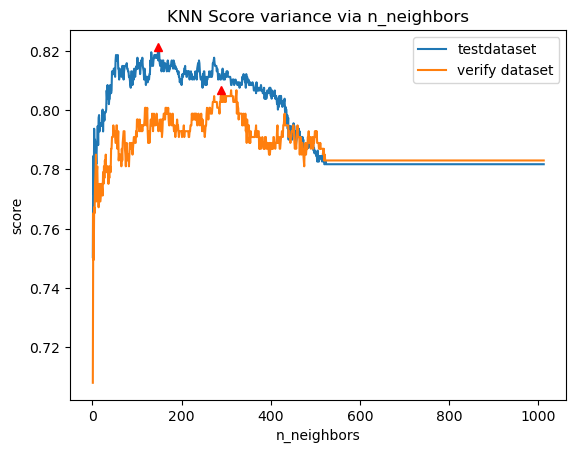

In [140]:
import matplotlib.pyplot as plt
plt.plot(range(1, X_train_scaled.shape[0] // 2), knnscore, label='testdataset')
plt.plot(range(1, X_train_scaled.shape[0] // 2), knnvarscore, label='verify dataset')
plt.plot(knnscore.index(max(knnscore)),max(knnscore), 'r^')
plt.plot(knnvarscore.index(max(knnvarscore)),max(knnvarscore), 'r^')
plt.title("KNN Score variance via n_neighbors")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

In [141]:
print(f"n of k = {knnscore.index(max(knnscore))+1}, {knnvarscore.index(max(knnvarscore))+1}")
print(f"max score = {max(knnscore):.5f}, {max(knnvarscore):.5f}")


n of k = 149, 290
max score = 0.82136, 0.80671


## 중간 결론
- 점수를 보다 넓은 범위로 카테고리화 하는 경우 정확도를 높힐 수 있다.
- 특정 k 일 경우 가장 높은 점수, 이후 점수가 떨어지는 경향성

In [142]:
# def evaluate(model, X_test, y_test):
#     predictions = model.predict(X_test)
#     errors = abs(predictions - y_test)
#     mape = 100 * np.mean(errors / y_test)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
# 
#     return accuracy
# 


In [143]:
# evaluate(modelLoaded, X_test_scaled, y_test)